In [113]:
import pandas as pd
import json
import datetime as dt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [114]:
#import the reviews.json file created by web scraper
all_reviews = pd.read_json('reviews.json', encoding='utf8')
#convert date variables to datetime datatype
all_reviews.date = pd.to_datetime(all_reviews.date)
all_reviews.date_flown = pd.to_datetime(all_reviews.date_flown)
#shrink the dataset to include reviews which stick to consistant format
reviews = (all_reviews['date'] > '2015-06-12')
reviews = all_reviews.loc[reviews]
reviews

,title,rating,text,date,aircraft_type,traveller_type,seat_type,route,date_flown,seat_comfort_rating,cabin_staff_rating,food_beverage_rating,entertainment_rating,ground_service_rating,wifi_rating,value_for_money_rating,recommended
0,"""Extremely sub-par service""",2.0,| Extremely sub-par service. Highlights: No o...,2022-11-28,A380,Solo Leisure,Economy Class,San Francisco to London,2022-11-01,2.0,1.0,2.0,2.0,3.0,1.0,2.0,no
1,"""the service was excellent""",7.0,| I virtually gave up on British Airways abo...,2022-11-26,A320,Solo Leisure,Business Class,London to Lisbon,2022-11-01,3.0,4.0,4.0,NaN,3.0,NaN,3.0,yes
2,"""I thoroughly enjoyed my flight""",7.0,| I was pleasantly surprised that the airlin...,2022-11-25,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,2022-01-01,4.0,4.0,4.0,4.0,4.0,NaN,4.0,yes
3,"""wouldn't let me check-in until 24 hours before""",1.0,"| British Airways is late, their website is ...",2022-11-23,None,Solo Leisure,Economy Class,Miami to Budapest via London,2022-11-01,2.0,3.0,3.0,4.0,1.0,NaN,1.0,no
4,"""Will honestly never fly them again if I can h...",4.0,| Flew from Amman to London on Nov. 14 2022. ...,2022-11-19,None,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),2022-11-01,3.0,2.0,1.0,NaN,4.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,British Airways customer review,6.0,"I flew from Seoul to London, business class an...",2015-06-16,boeing 787,Solo Leisure,Business Class,Seoul to London,2015-06-01,4.0,3.0,3.0,4.0,3.0,NaN,3.0,yes
2639,British Airways customer review,10.0,I flew out on the 8th June 2015 and all I can ...,2015-06-14,None,Couple Leisure,Economy Class,London to Turkey,2015-06-01,5.0,5.0,5.0,NaN,5.0,NaN,5.0,yes
2640,British Airways customer review,9.0,I fly with this airline almost every other wee...,2015-06-14,None,Solo Leisure,Economy Class,Abu Dhabi to Muscat,2015-06-01,5.0,5.0,3.0,NaN,4.0,NaN,5.0,yes
2641,British Airways customer review,6.0,"Ended up on a 25-year-old 747, the second-olde...",2015-06-14,B747-400,Solo Leisure,Economy Class,LHR to YYZ,2015-05-01,3.0,4.0,4.0,4.0,4.0,NaN,4.0,yes


In [115]:
#export data as csv file
reviews.to_csv('BA_Reviews.csv', index=False, encoding='utf8')

In [116]:
#print basic info about data
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2643 entries, 0 to 2642
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   2643 non-null   object        
 1   rating                  2643 non-null   float64       
 2   text                    2643 non-null   object        
 3   date                    2643 non-null   datetime64[ns]
 4   aircraft_type           1777 non-null   object        
 5   traveller_type          2641 non-null   object        
 6   seat_type               2642 non-null   object        
 7   route                   2639 non-null   object        
 8   date_flown              2642 non-null   datetime64[ns]
 9   seat_comfort_rating     2546 non-null   float64       
 10  cabin_staff_rating      2539 non-null   float64       
 11  food_beverage_rating    2315 non-null   float64       
 12  entertainment_rating    1635 non-null   float64 

In [117]:
#create pre-covid lockdown subset
reviews_pre_covid = (reviews['date_flown'] <= '2020-02-01')
reviews_pre_covid = reviews.loc[reviews_pre_covid]

In [118]:
reviews_pre_covid

,title,rating,text,date,aircraft_type,traveller_type,seat_type,route,date_flown,seat_comfort_rating,cabin_staff_rating,food_beverage_rating,entertainment_rating,ground_service_rating,wifi_rating,value_for_money_rating,recommended
286,"""refunded my tickets within 2 working days""",10.0,| I am extremely pleased with British Airways...,2020-10-22,None,Couple Leisure,Economy Class,Munich to London,2019-11-01,5.0,5.0,5.0,5.0,5.0,5.0,5.0,yes
290,"""I filed a claim""",1.0,| My flight from Los Angeles to Paris via Lo...,2020-08-27,A321,Couple Leisure,Economy Class,London to Paris,2020-02-01,2.0,3.0,2.0,NaN,5.0,NaN,1.0,no
296,"""This is appalling business practice!""",1.0,"| BA cancelled my flight to Lyon, March/April...",2020-06-11,None,Business,Economy Class,London Heathrow to Lyon,2020-02-01,1.0,1.0,NaN,NaN,1.0,NaN,1.0,no
297,"""efficient, clean and punctual""",8.0,| A short hop from London to Edinburgh in No...,2020-06-08,Embraer 195,Business,Economy Class,London City to Edinburgh,2019-11-01,3.0,4.0,NaN,NaN,5.0,NaN,3.0,yes
302,"""no refund or voucher""",1.0,| I booked my honeymoon flight from San Dieg...,2020-05-12,None,Couple Leisure,Business Class,San Diego to Barcelona via London,2019-12-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2638,British Airways customer review,6.0,"I flew from Seoul to London, business class an...",2015-06-16,boeing 787,Solo Leisure,Business Class,Seoul to London,2015-06-01,4.0,3.0,3.0,4.0,3.0,NaN,3.0,yes
2639,British Airways customer review,10.0,I flew out on the 8th June 2015 and all I can ...,2015-06-14,None,Couple Leisure,Economy Class,London to Turkey,2015-06-01,5.0,5.0,5.0,NaN,5.0,NaN,5.0,yes
2640,British Airways customer review,9.0,I fly with this airline almost every other wee...,2015-06-14,None,Solo Leisure,Economy Class,Abu Dhabi to Muscat,2015-06-01,5.0,5.0,3.0,NaN,4.0,NaN,5.0,yes
2641,British Airways customer review,6.0,"Ended up on a 25-year-old 747, the second-olde...",2015-06-14,B747-400,Solo Leisure,Economy Class,LHR to YYZ,2015-05-01,3.0,4.0,4.0,4.0,4.0,NaN,4.0,yes


In [119]:
reviews_pre_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2324 entries, 286 to 2642
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   2324 non-null   object        
 1   rating                  2324 non-null   float64       
 2   text                    2324 non-null   object        
 3   date                    2324 non-null   datetime64[ns]
 4   aircraft_type           1624 non-null   object        
 5   traveller_type          2323 non-null   object        
 6   seat_type               2323 non-null   object        
 7   route                   2322 non-null   object        
 8   date_flown              2324 non-null   datetime64[ns]
 9   seat_comfort_rating     2276 non-null   float64       
 10  cabin_staff_rating      2270 non-null   float64       
 11  food_beverage_rating    2072 non-null   float64       
 12  entertainment_rating    1487 non-null   float6

In [120]:
#create post-covid lockdown subset
reviews_post_covid = (reviews['date_flown'] >= '2020-03-01')
reviews_post_covid = reviews.loc[reviews_post_covid]

In [121]:
reviews_post_covid

,title,rating,text,date,aircraft_type,traveller_type,seat_type,route,date_flown,seat_comfort_rating,cabin_staff_rating,food_beverage_rating,entertainment_rating,ground_service_rating,wifi_rating,value_for_money_rating,recommended
0,"""Extremely sub-par service""",2.0,| Extremely sub-par service. Highlights: No o...,2022-11-28,A380,Solo Leisure,Economy Class,San Francisco to London,2022-11-01,2.0,1.0,2.0,2.0,3.0,1.0,2.0,no
1,"""the service was excellent""",7.0,| I virtually gave up on British Airways abo...,2022-11-26,A320,Solo Leisure,Business Class,London to Lisbon,2022-11-01,3.0,4.0,4.0,NaN,3.0,NaN,3.0,yes
2,"""I thoroughly enjoyed my flight""",7.0,| I was pleasantly surprised that the airlin...,2022-11-25,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,2022-01-01,4.0,4.0,4.0,4.0,4.0,NaN,4.0,yes
3,"""wouldn't let me check-in until 24 hours before""",1.0,"| British Airways is late, their website is ...",2022-11-23,None,Solo Leisure,Economy Class,Miami to Budapest via London,2022-11-01,2.0,3.0,3.0,4.0,1.0,NaN,1.0,no
4,"""Will honestly never fly them again if I can h...",4.0,| Flew from Amman to London on Nov. 14 2022. ...,2022-11-19,None,Solo Leisure,Premium Economy,Amman Jordan to London UK (Heathrow),2022-11-01,3.0,2.0,1.0,NaN,4.0,NaN,2.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,"""narrow business class facing seats""",1.0,"| Lower Deck Club Class seat, with the curre...",2020-03-17,Boeing 747-400,Business,Business Class,Chicago to London Heathrow,2020-03-01,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no
324,"""still forcing people to fly to Madrid""",1.0,| Diabolical that British Airways are still ...,2020-03-16,None,Solo Leisure,Economy Class,London to Madrid,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
326,"""live in a conceited bubble""",2.0,| London to Paris return group booking cance...,2020-03-13,None,Business,Business Class,London to Paris CDG,2020-03-01,NaN,NaN,NaN,NaN,NaN,NaN,1.0,no
327,"""rude staff and service""",1.0,| London City to Berlin on 8th March. Flight...,2020-03-09,None,Couple Leisure,Economy Class,London City to Berlin,2020-03-01,NaN,NaN,NaN,NaN,1.0,NaN,1.0,no


In [122]:
reviews_post_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 330
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   title                   318 non-null    object        
 1   rating                  318 non-null    float64       
 2   text                    318 non-null    object        
 3   date                    318 non-null    datetime64[ns]
 4   aircraft_type           152 non-null    object        
 5   traveller_type          317 non-null    object        
 6   seat_type               318 non-null    object        
 7   route                   316 non-null    object        
 8   date_flown              318 non-null    datetime64[ns]
 9   seat_comfort_rating     269 non-null    float64       
 10  cabin_staff_rating      268 non-null    float64       
 11  food_beverage_rating    242 non-null    float64       
 12  entertainment_rating    148 non-null    float64   

In [54]:
##print counts of recommended variable
reviews['recommended'].value_counts()

no     1658
yes     985
Name: recommended, dtype: int64

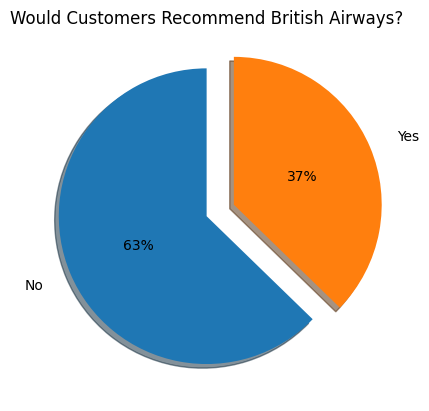

In [55]:
#Convert pandas series to a numpy array and display data as a matplotlib pe chart
y = np.array(list(reviews['recommended'].value_counts()))
mylabels = ["No", "Yes"]
myexplode = [0, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, startangle = 90, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.title("Would Customers Recommend British Airways?")
plt.savefig('figures/overall_recommended.png')
plt.show() 

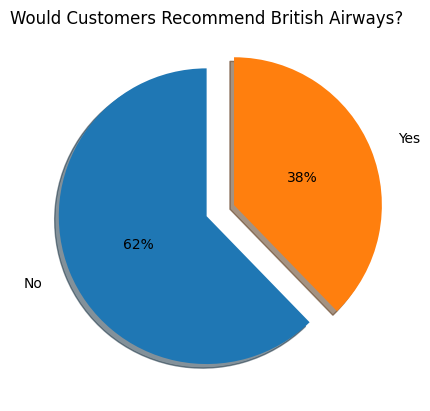

In [56]:
y = np.array(list(reviews_pre_covid['recommended'].value_counts()))
mylabels = ["No", "Yes"]
myexplode = [0, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, startangle = 90, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.title("Would Customers Recommend British Airways?")
plt.savefig('figures/pre_covid_recommended.png')
plt.show()

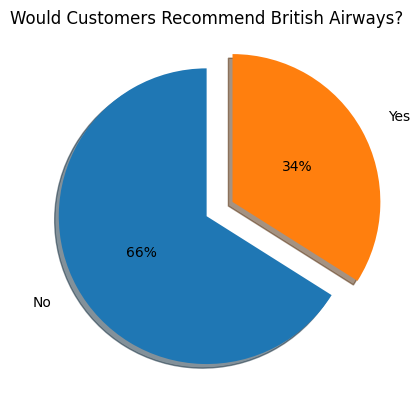

In [57]:
y = np.array(list(reviews_post_covid['recommended'].value_counts()))
mylabels = ["No", "Yes"]
myexplode = [0, 0.2]

plt.pie(y, labels = mylabels, explode = myexplode, shadow = True, startangle = 90, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.2)
plt.title("Would Customers Recommend British Airways?")
plt.savefig('figures/post_covid_recommended.png')
plt.show()

In [123]:
#Create pandas dataframes containing amenity ratings for pre-covid data
seat_comfort_pre = reviews_pre_covid[reviews_pre_covid['seat_comfort_rating'].notna()]['seat_comfort_rating']
cabin_staff_pre = reviews_pre_covid[reviews_pre_covid['cabin_staff_rating'].notna()]['cabin_staff_rating']
food_beverage_pre = reviews_pre_covid[reviews_pre_covid['food_beverage_rating'].notna()]['food_beverage_rating']
entertainment_pre = reviews_pre_covid[reviews_pre_covid['entertainment_rating'].notna()]['entertainment_rating']
ground_service_pre = reviews_pre_covid[reviews_pre_covid['ground_service_rating'].notna()]['ground_service_rating']
wifi_pre = reviews_pre_covid[reviews_pre_covid['wifi_rating'].notna()]['wifi_rating']
value_for_money_pre = reviews_pre_covid[reviews_pre_covid['value_for_money_rating'].notna()]['value_for_money_rating']

In [124]:
#Create pandas dataframes containing amenity ratings for overall data
seat_comfort_over = reviews[reviews['seat_comfort_rating'].notna()]['seat_comfort_rating']
cabin_staff_over = reviews[reviews['cabin_staff_rating'].notna()]['cabin_staff_rating']
food_beverage_over = reviews[reviews['food_beverage_rating'].notna()]['food_beverage_rating']
entertainment_over = reviews[reviews['entertainment_rating'].notna()]['entertainment_rating']
ground_service_over = reviews[reviews['ground_service_rating'].notna()]['ground_service_rating']
wifi_over = reviews[reviews['wifi_rating'].notna()]['wifi_rating']
value_for_money_over = reviews[reviews['value_for_money_rating'].notna()]['value_for_money_rating']

In [125]:
#Create pandas dataframes containing amenity ratings for post-covid data
seat_comfort_post = reviews_post_covid[reviews_post_covid['seat_comfort_rating'].notna()]['seat_comfort_rating']
cabin_staff_post = reviews_post_covid[reviews_post_covid['cabin_staff_rating'].notna()]['cabin_staff_rating']
food_beverage_post = reviews_post_covid[reviews_post_covid['food_beverage_rating'].notna()]['food_beverage_rating']
entertainment_post = reviews_post_covid[reviews_post_covid['entertainment_rating'].notna()]['entertainment_rating']
ground_service_post = reviews_post_covid[reviews_post_covid['ground_service_rating'].notna()]['ground_service_rating']
wifi_post = reviews_post_covid[reviews_post_covid['wifi_rating'].notna()]['wifi_rating']
value_for_money_post = reviews_post_covid[reviews_post_covid['value_for_money_rating'].notna()]['value_for_money_rating']

In [131]:
#increase font size of plots
plt.rcParams.update({'font.size': 15})

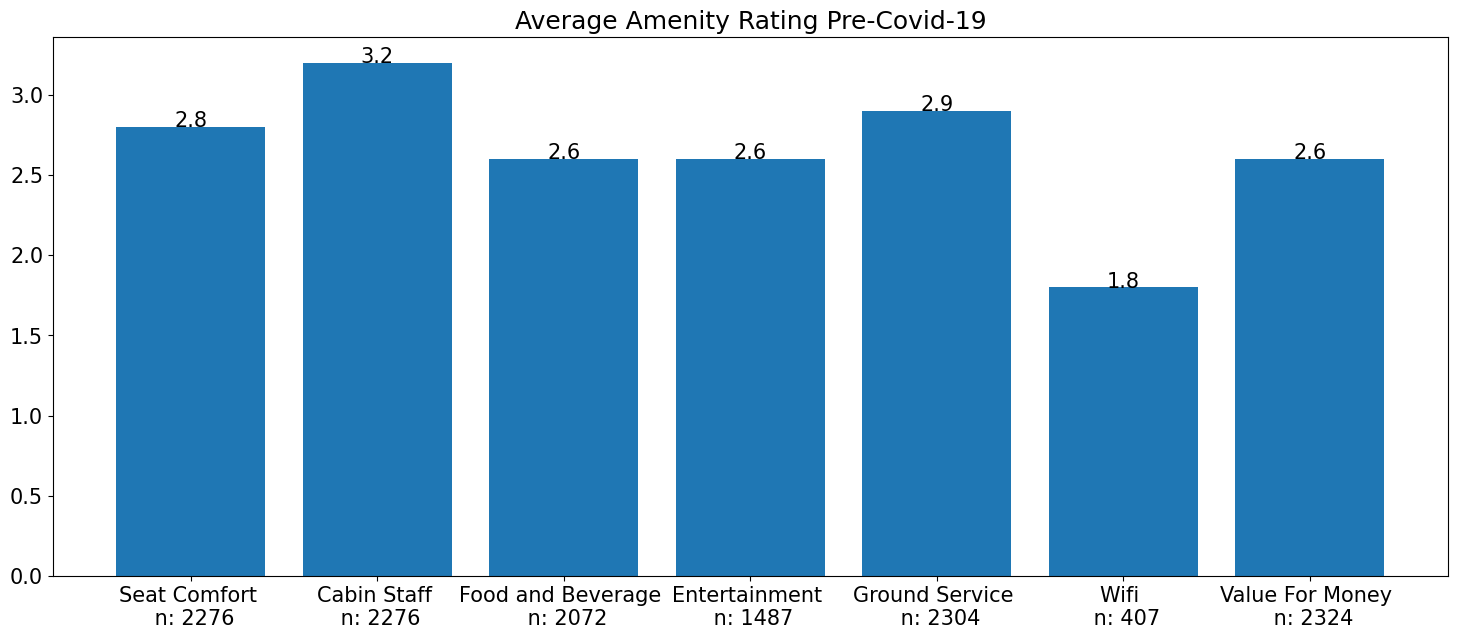

In [135]:
#instantiate the x (amenity type) and y (average amenity ratings) data for bar chart as 2 lists
fig, ax = plt.subplots(figsize=(18,7))
amenity = ['Seat Comfort \n n: ' + str(seat_comfort_pre.size), 'Cabin Staff \n n: ' + str(seat_comfort_pre.size), 'Food and Beverage \n n: ' + str(food_beverage_pre.size), 'Entertainment \n n: ' + str(entertainment_pre.size), 'Ground Service \n n: ' + str(ground_service_pre.size), 'Wifi \n n: ' + str(wifi_pre.size), 'Value For Money \n n: ' + str(value_for_money_pre.size)]
avg_rating = [round(seat_comfort_pre.mean(), 1),round(cabin_staff_pre.mean(), 1),round(food_beverage_pre.mean(), 1),round(entertainment_pre.mean(), 1),round(ground_service_pre.mean(), 1),round(wifi_pre.mean(), 1), round(value_for_money_pre.mean(), 1)]

#display bar value above bar
for i in range(len(amenity)):
        plt.text(i, avg_rating[i], avg_rating[i], ha = 'center')

#plot x and y as a matplotlib bar graph
ax.bar(amenity,avg_rating)
plt.title("Average Amenity Rating Pre-Covid-19")
plt.savefig('figures/avg_amenity_pre.png')
plt.show()

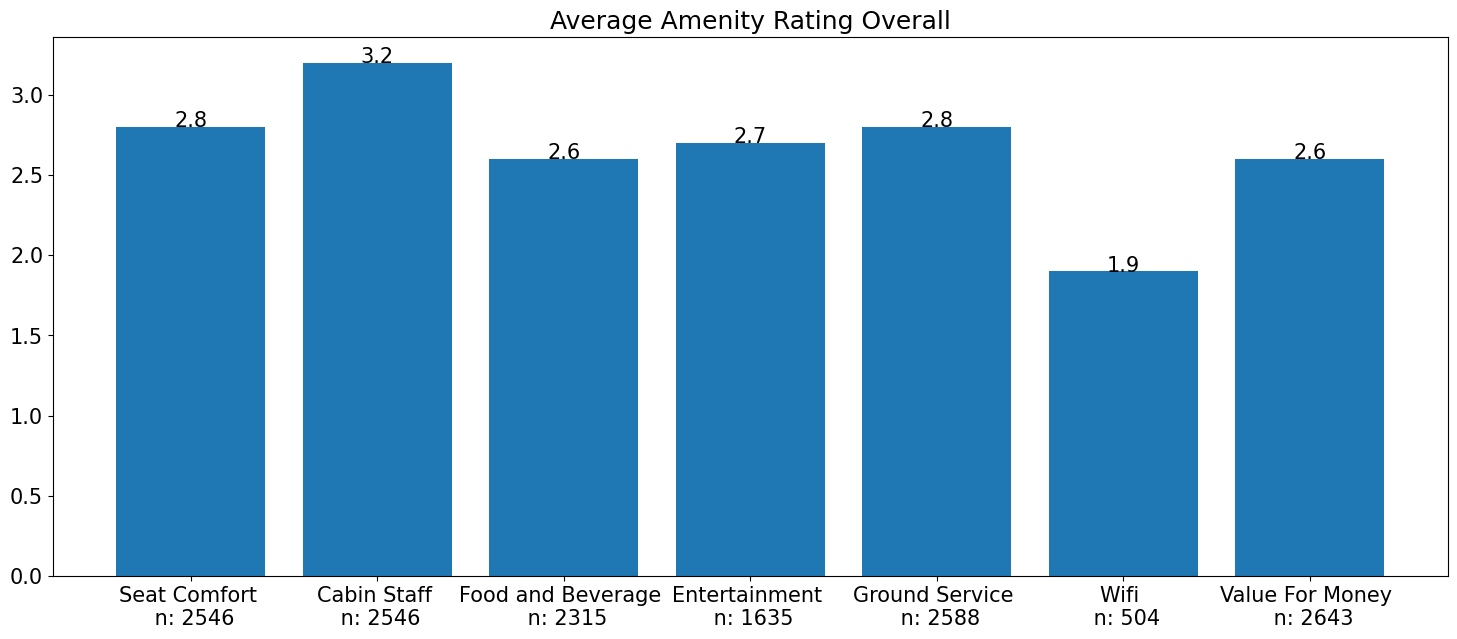

In [139]:
fig, ax = plt.subplots(figsize=(18,7))
amenity = ['Seat Comfort \n n: ' + str(seat_comfort_over.size), 'Cabin Staff \n n: ' + str(seat_comfort_over.size), 'Food and Beverage \n n: ' + str(food_beverage_over.size), 'Entertainment \n n: ' + str(entertainment_over.size), 'Ground Service \n n: ' + str(ground_service_over.size), 'Wifi \n n: ' + str(wifi_over.size), 'Value For Money \n n: ' + str(value_for_money_over.size)]
avg_rating = [round(seat_comfort_over.mean(), 1),round(cabin_staff_over.mean(), 1),round(food_beverage_over.mean(), 1),round(entertainment_over.mean(), 1),round(ground_service_over.mean(), 1),round(wifi_over.mean(), 1), round(value_for_money_over.mean(), 1)]

for i in range(len(amenity)):
        plt.text(i, avg_rating[i], avg_rating[i], ha = 'center')

ax.bar(amenity,avg_rating)
plt.title("Average Amenity Rating Overall")
plt.savefig('figures/avg_amenity_over.png')
plt.show()

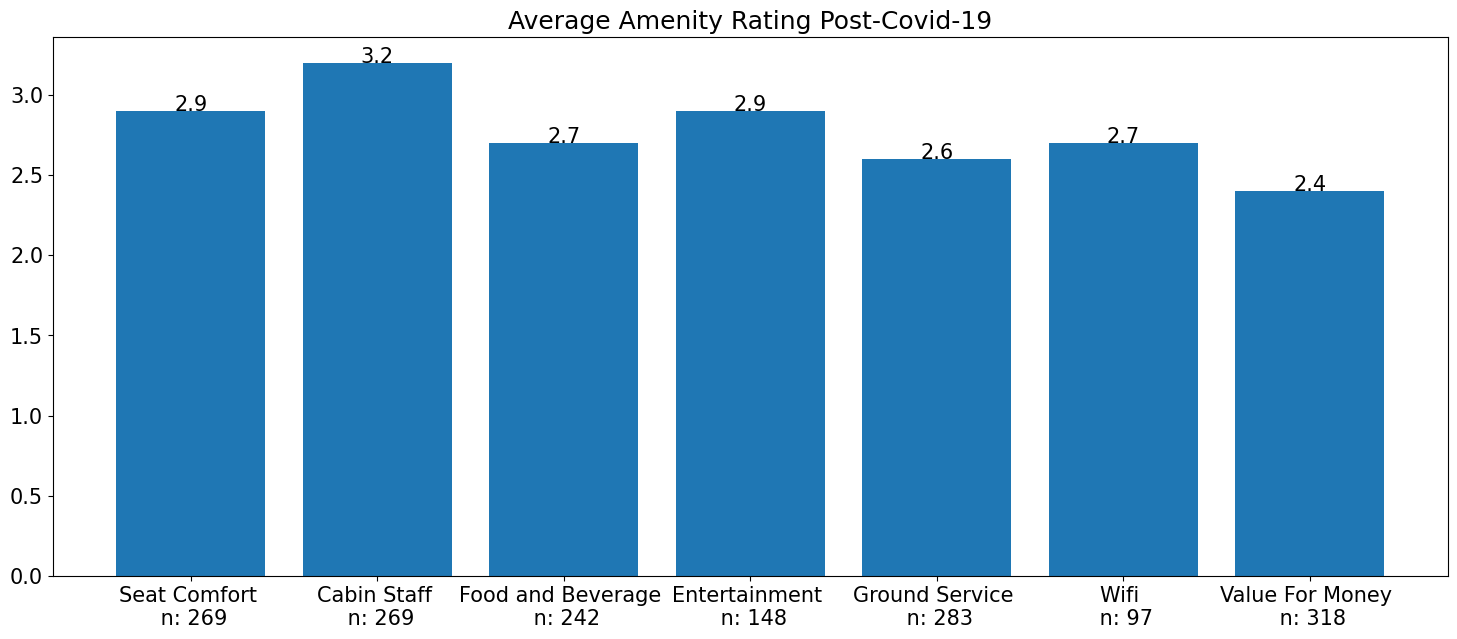

In [138]:
fig, ax = plt.subplots(figsize=(18,7))
amenity = ['Seat Comfort \n n: ' + str(seat_comfort_post.size), 'Cabin Staff \n n: ' + str(seat_comfort_post.size), 'Food and Beverage \n n: ' + str(food_beverage_post.size), 'Entertainment \n n: ' + str(entertainment_post.size), 'Ground Service \n n: ' + str(ground_service_post.size), 'Wifi \n n: ' + str(wifi_post.size), 'Value For Money \n n: ' + str(value_for_money_post.size)]
avg_rating = [round(seat_comfort_post.mean(), 1),round(cabin_staff_post.mean(), 1),round(food_beverage_post.mean(), 1),round(entertainment_post.mean(), 1),round(ground_service_post.mean(), 1),round(wifi_post.mean(), 1), round(value_for_money_post.mean(), 1)]

for i in range(len(amenity)):
        plt.text(i, avg_rating[i], avg_rating[i], ha = 'center')

ax.bar(amenity,avg_rating)
plt.title("Average Amenity Rating Post-Covid-19")
plt.savefig('figures/avg_amenity_post.png')
plt.show()

In [64]:
#create a pandas series of average rating by quarter
time_series_reviews = reviews.groupby(pd.PeriodIndex(reviews['date'], freq="Q"))['rating'].mean()
time_series_reviews

date
2015Q2    5.777778
2015Q3    4.804878
2015Q4    5.241546
2016Q1    5.408451
2016Q2    5.335766
2016Q3    4.556452
2016Q4    4.658683
2017Q1    3.911950
2017Q2    3.615819
2017Q3    3.958678
2017Q4    4.000000
2018Q1    4.234568
2018Q2    4.255102
2018Q3    4.862500
2018Q4    3.846154
2019Q1    4.643678
2019Q2    5.214286
2019Q3    4.260870
2019Q4    4.967742
2020Q1    4.630769
2020Q2    2.571429
2020Q3    3.500000
2020Q4    6.800000
2021Q1    3.000000
2021Q2    5.900000
2021Q3    3.590909
2021Q4    4.448980
2022Q1    3.800000
2022Q2    3.904110
2022Q3    4.119048
2022Q4    4.612903
Freq: Q-DEC, Name: rating, dtype: float64

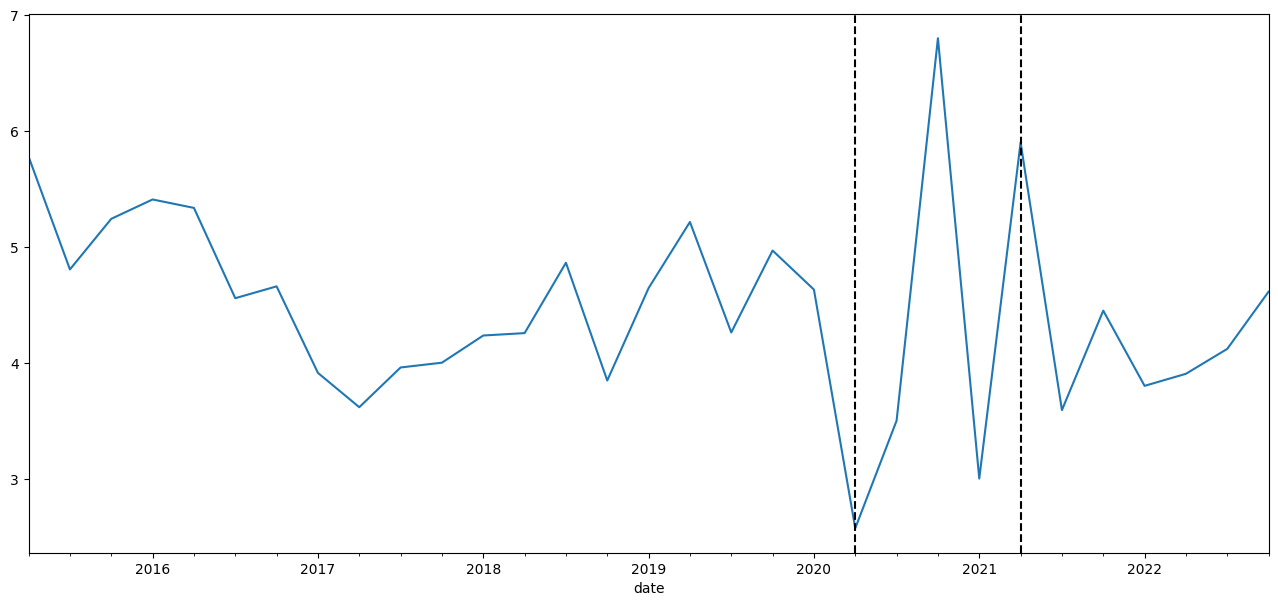

In [65]:
#Plot the average rating quarterly as a line graph
fig, ax = plt.subplots(figsize=(16,7))
time_series_reviews.plot.line()
ax.axvline(x='2020Q2', color='k', linestyle="--") #line for start of lockdown
ax.axvline(x='2021Q2', color='k', linestyle="--") #line for end of lockdown
plt.show()

In [66]:
reviews[['rating', 'seat_type']].groupby('seat_type').mean()

,rating
seat_type,
Business Class,4.910319
Economy Class,4.172874
First Class,5.611842
Premium Economy,4.632411


In [67]:
#create pandas dataframes of rating and date sorted by seat type
seat_data = reviews[['rating', 'date', 'seat_type']]
seat_data_eco = (seat_data['seat_type'] == 'Economy Class')
seat_data_eco = seat_data.loc[seat_data_eco]
seat_data_pre = (seat_data['seat_type'] == 'Premium Economy')
seat_data_pre = seat_data.loc[seat_data_pre]
seat_data_bus = (seat_data['seat_type'] == 'Business Class')
seat_data_bus = seat_data.loc[seat_data_bus]
seat_data_fir = (seat_data['seat_type'] == 'First Class')
seat_data_fir = seat_data.loc[seat_data_fir]

In [68]:
#create a pandas series of average economy class rating by quarter
seat_data_eco_series = seat_data_eco.groupby(pd.PeriodIndex(seat_data_eco['date'], freq="Q"))['rating'].mean()
seat_data_eco_series

date
2015Q2    5.615385
2015Q3    4.454545
2015Q4    4.826923
2016Q1    5.704225
2016Q2    4.628571
2016Q3    4.524590
2016Q4    4.529412
2017Q1    3.510204
2017Q2    3.305263
2017Q3    4.000000
2017Q4    3.349206
2018Q1    4.150000
2018Q2    3.680000
2018Q3    4.150000
2018Q4    3.485714
2019Q1    4.489796
2019Q2    4.903846
2019Q3    4.442308
2019Q4    4.421053
2020Q1    4.212121
2020Q2    2.166667
2020Q3    2.666667
2020Q4    7.125000
2021Q1    2.800000
2021Q2    5.600000
2021Q3    2.916667
2021Q4    3.636364
2022Q1    2.631579
2022Q2    2.918919
2022Q3    4.000000
2022Q4    3.352941
Freq: Q-DEC, Name: rating, dtype: float64

In [69]:
#create a pandas series of average premium economy class rating by quarter
seat_data_pre_series = seat_data_pre.groupby(pd.PeriodIndex(seat_data_pre['date'], freq="Q"))['rating'].mean()
seat_data_pre_series

date
2015Q2    3.000000
2015Q3    7.111111
2015Q4    5.466667
2016Q1    4.210526
2016Q2    5.625000
2016Q3    4.000000
2016Q4    4.178571
2017Q1    5.000000
2017Q2    3.500000
2017Q3    4.333333
2017Q4    5.250000
2018Q1    3.166667
2018Q2    4.166667
2018Q3    6.000000
2018Q4    4.400000
2019Q1    5.230769
2019Q2    1.000000
2019Q3    4.428571
2019Q4    3.100000
2020Q1    5.750000
2020Q2    1.000000
2020Q3    2.000000
2020Q4    4.000000
2021Q3    1.000000
2021Q4    5.400000
2022Q1    4.800000
2022Q2    6.000000
2022Q3    4.333333
2022Q4    4.000000
Freq: Q-DEC, Name: rating, dtype: float64

In [70]:
#create a pandas series of average business class rating by quarter
seat_data_bus_series = seat_data_bus.groupby(pd.PeriodIndex(seat_data_bus['date'], freq="Q"))['rating'].mean()
seat_data_bus_series

date
2015Q2     6.600000
2015Q3     5.219178
2015Q4     5.559322
2016Q1     5.342105
2016Q2     6.100000
2016Q3     4.674419
2016Q4     4.406250
2017Q1     4.431818
2017Q2     4.018519
2017Q3     3.914286
2017Q4     4.800000
2018Q1     4.354839
2018Q2     5.068966
2018Q3     5.076923
2018Q4     3.555556
2019Q1     4.777778
2019Q2     5.346154
2019Q3     3.781250
2019Q4     6.800000
2020Q1     4.769231
2020Q2     4.166667
2020Q3    10.000000
2020Q4     7.000000
2021Q2     6.200000
2021Q3     4.777778
2021Q4     4.857143
2022Q1     4.700000
2022Q2     4.781250
2022Q3     4.250000
2022Q4     6.307692
Freq: Q-DEC, Name: rating, dtype: float64

In [71]:
#create a pandas series of average first class rating by quarter
seat_data_fir_series = seat_data_fir.groupby(pd.PeriodIndex(seat_data_fir['date'], freq="Q"))['rating'].mean()
seat_data_fir_series

date
2015Q2    6.500000
2015Q3    3.846154
2015Q4    6.500000
2016Q1    5.714286
2016Q2    6.636364
2016Q3    4.727273
2016Q4    6.136364
2017Q1    4.600000
2017Q2    5.333333
2017Q3    2.000000
2017Q4    4.333333
2018Q1    5.750000
2018Q2    5.142857
2018Q3    7.400000
2018Q4    6.000000
2019Q1    4.285714
2019Q2    8.600000
2019Q3    9.000000
2019Q4    9.000000
2020Q1    7.500000
2020Q2    1.000000
2021Q1    4.000000
2021Q4    9.000000
2022Q1    3.000000
Freq: Q-DEC, Name: rating, dtype: float64

C:\Users\kiera\AppData\Local\Temp\ipykernel_37124\1564736836.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2016 \n Q1', '2017 \n Q1', '2018 \n Q1', '2019 \n Q1', '2020 \n Q1', '2021 \n Q1', '2022 \n Q1'])


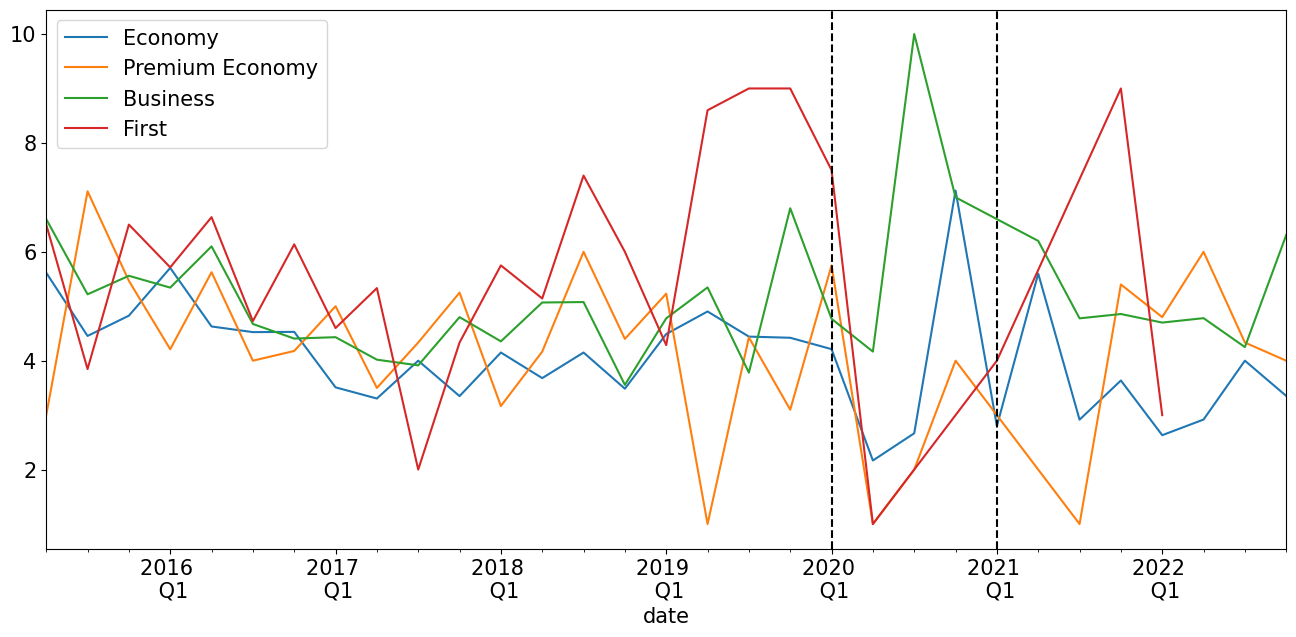

In [140]:
#Plot pandas series data as lines on a line graph
from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(figsize=(16,7))
seat_data_eco_series.plot.line()
seat_data_pre_series.plot.line()
seat_data_bus_series.plot.line()
seat_data_fir_series.plot.line()
ax.axvline(x='2020Q1', color='k', linestyle="--") #line for start of lockdown
ax.axvline(x='2021Q1', color='k', linestyle="--") #line for end of lockdown
ax.set_xticklabels(['2016 \n Q1', '2017 \n Q1', '2018 \n Q1', '2019 \n Q1', '2020 \n Q1', '2021 \n Q1', '2022 \n Q1'])
ax.legend(["Economy", "Premium Economy", "Business", "First"])
plt.savefig('figures/avg_rating_over_time.png')
plt.show()

In [88]:
#words to be removed from word frequency pool
additional_stopwords = ['trip', 'verified', 'british', 'airways', 'flight', 'ba', 'would', 'seat', 'service', 'airline', 'london']

In [89]:
def frequencies(tokens):
    #Function which takes a collection of text and decomposes it into single and paired words based on frequency of occurence
    tokens = [t.lower() for t in tokens]
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    tokens = [t for t in tokens if t not in additional_stopwords]
    tokens = [t for t in tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    counted = Counter(tokens)
    counted_pairs = Counter(ngrams(tokens, 2))
    single_word_data = pd.DataFrame(counted.items(), columns = ['word', 'frequency']).sort_values(by='frequency', ascending=False)
    paired_word_data = pd.DataFrame(counted_pairs.items(), columns = ['pairs', 'frequency']).sort_values(by='frequency', ascending=False)
    return single_word_data, paired_word_data

In [102]:
#create two sub samples containing positive and negative reviews
reviews_positive = reviews.loc[reviews['rating'] >= 8]
reviews_negative = reviews.loc[reviews['rating'] <= 3]

In [103]:
#tokenize positive words
all_positive_words = " ".join(reviews_positive['text'])
positive_words = word_tokenize(all_positive_words)

In [104]:
#create pandas dataframes of single and paired positive words
positive_single_word_data, positive_paired_word_data = frequencies(positive_words)

In [105]:
#tokenize negative words
all_negative_words = " ".join(reviews_negative['text'])
negative_words = word_tokenize(all_negative_words)

In [106]:
#create pandas dataframes of single and paired negative words
negative_single_word_data, negative_paired_word_data = frequencies(negative_words)

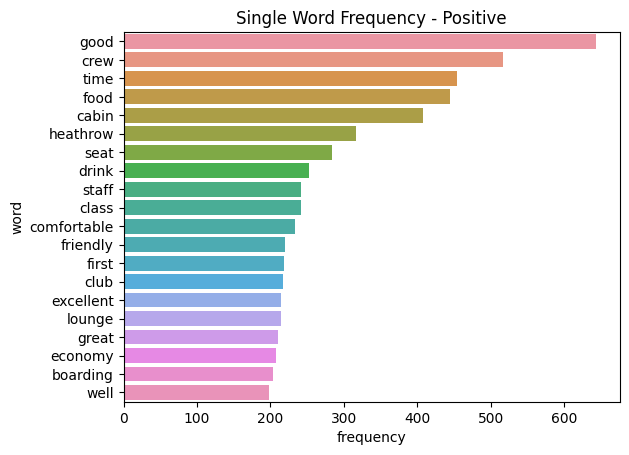

In [107]:
#plot word occurence against word as a seaborn horizontal bar chart
sns_plot = sns.barplot(x = 'frequency', y = 'word', data=positive_single_word_data.head(20)).set(title='Single Word Frequency - Positive')
plt.savefig('figures/single_word_prositive.png', bbox_inches='tight')

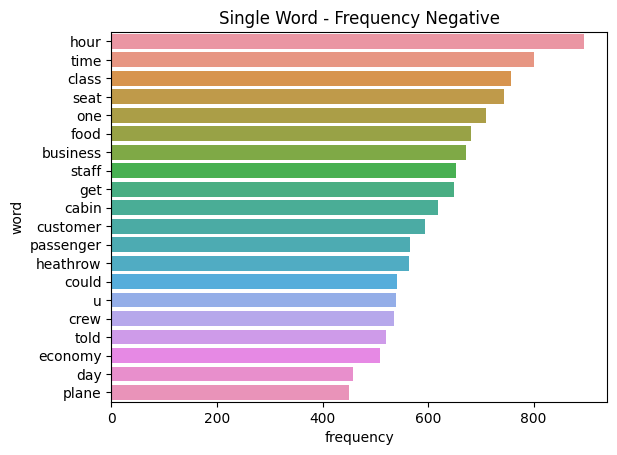

In [108]:
sns_plot = sns.barplot(x = 'frequency', y = 'word', data=negative_single_word_data.head(20)).set(title='Single Word - Frequency Negative')
plt.savefig('figures/single_word_negative.png', bbox_inches='tight')

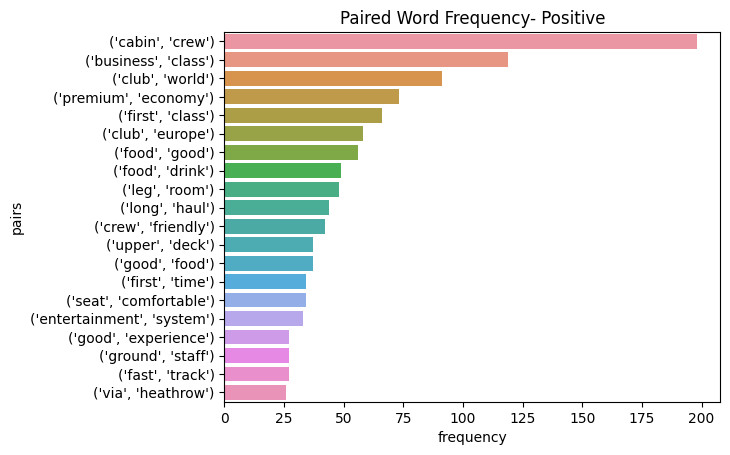

In [110]:
sns_plot = sns.barplot(x = 'frequency', y = 'pairs', data=positive_paired_word_data.head(20)).set(title='Paired Word Frequency- Positive')
plt.savefig('figures/double_word_positive.png', bbox_inches='tight')

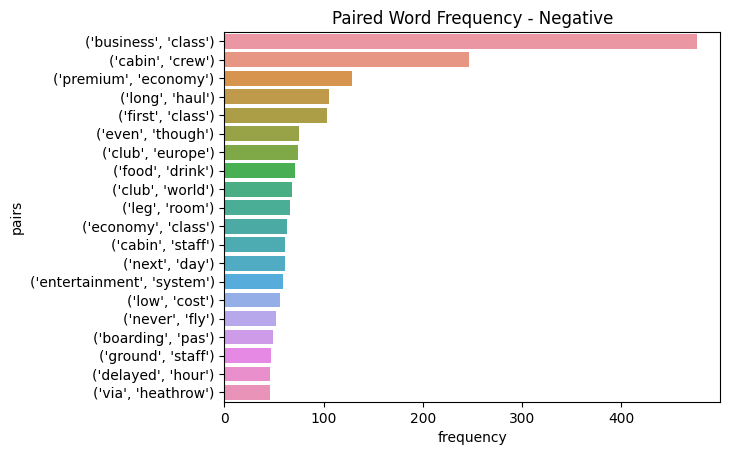

In [111]:
sns_plot = sns.barplot(x = 'frequency', y = 'pairs', data=negative_paired_word_data.head(20)).set(title='Paired Word Frequency - Negative')
plt.savefig('figures/double_word_negative.png', bbox_inches='tight')